<h1><b>Regresión lineal</b></h1>

## **¿Qué es la regresión lineal?**

Es un método estadístico que modela la relación entre una variable dependiente \(Y\) y una o más variables independientes \(X\) ajustando una línea recta.


### **Ejemplo sencillo**  
- X: horas de estudio  
- Y: nota del examen  
Si hay relación positiva, más horas mejor nota.


### **Ecuación general (regresión lineal simple)**  
$$ Y = mX + b $$
- m: pendiente (cuánto cambia Y si X aumenta en 1)  
- b: intercepto (valor de Y cuando X = 0)



El objetivo de trabajar con regresión lineal es minimizar la distancia vertical entre todos los datos y nuestra línea, por lo tanto, para determinar la mejor línea, debemos minimizar la distancia entre todos los puntos y la distancia de nuestra línea.




### **Si hay varias $$X$$ (regresión lineal múltiple)**  

$$
Y = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n
$$


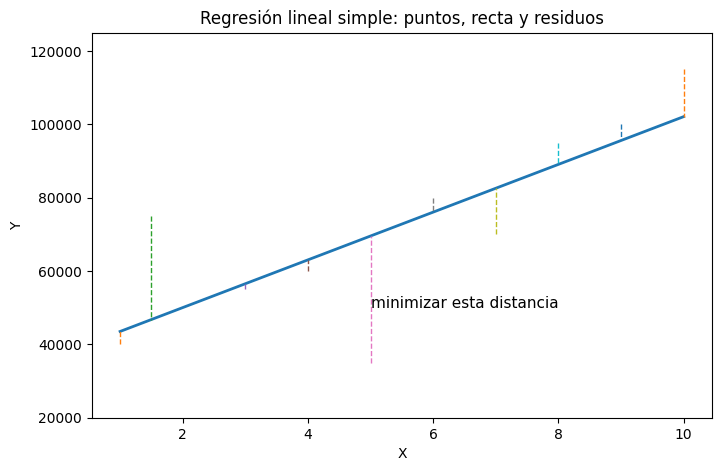

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Datos de ejemplo
x = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([40000, 75000, 50000, 55000, 60000, 35000, 80000, 70000, 95000, 100000, 115000])

# 2) Ajuste de regresión (mínimos cuadrados)
b1, b0 = np.polyfit(x, y, 1)  # pendiente, intercepto

# 3) Puntos de la recta
x_line = np.linspace(x.min(), x.max(), 200)
y_line = b1 * x_line + b0

# 4) Gráfico
plt.figure(figsize=(8, 5))

# Puntos como círculos huecos
plt.scatter(x, y, facecolors='none', s=80, linewidths=1.5)

# Línea de regresión
plt.plot(x_line, y_line, linewidth=2)

# Líneas verticales (residuos)
y_hat = b1 * x + b0
for xi, yi, yhi in zip(x, y, y_hat):
    plt.plot([xi, xi], [yi, yhi], linestyle='--', linewidth=1)

# Texto guía
plt.text(5, 50000, "minimizar esta distancia", fontsize=11)

# Ejes y título
plt.ylim(20000, 125000)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión lineal simple: puntos, recta y residuos")

plt.show()


* Una forma en que el modelo de regresión encuentre la mejor línea de ajuste es utilizando el críterio demínimos cuadrados para reducir el error.
* El error es una parte inevitable en el proceso de predicción, no importa cuan poderoso sea el algoritmo que elijamos, siempre habrá un eroror irreductible.
* Pero podemos intentar reducirlo al nivel más bajo posible.


### **Mínimo cuadrados**
La técnica de mínimos cuadrados intenta reducir la suma de los errores al cuadrado, buscando el mejor valor posible de los coeficientes de regresión



<hr>

### **¿Qué problema resuelve la regresión lineal?**

Imagina que tienes datos con un patrón que parece seguir una tendencia:

- Ejemplo: horas de estudio X y nota de examen Y.
- Queremos **predecir Y** para un nuevo valor de X.

La regresión lineal busca la **línea recta que mejor se ajuste** a esos puntos.  
Esta línea se llama **recta de regresión**.



# Cálculo manual de una regresión lineal simple

## Datos de ejemplo
| X (horas de estudio) | Y (nota examen) |
|---|---|
| 1 | 2 |
| 2 | 4 |
| 3 | 5 |


## Paso 1: Calcular promedios
$$
promedio(x) = \frac{1 + 2 + 3}{3} = 2
$$

$$
promedio(y) = \frac{2 + 4 + 5}{3} = 3.67
$$


### Paso 2: Calcular pendiente:  $$b_1$$


**Tabla de cálculo**

| $$x_i$$ | $$y_i$$ | $$x_i - \bar{x}$$ | $$y_i - \bar{y}$$ | $$(x_i - \bar{x})(y_i - \bar{y})$$ | $$(x_i - \bar{x})^2$$ |
|---:|---:|---:|---:|---:|---:|
| 1 | 2 | -1 | -1.67 | 1.67 | 1 |
| 2 | 4 | 0  | 0.33  | 0.00 | 0 |
| 3 | 5 | 1  | 1.33  | 1.33 | 1 |

Sumas:
$$
\sum (x_i - \bar{x})(y_i - \bar{y}) = 1.67 + 0 + 1.33 = 3.00
$$
$$
\sum (x_i - \bar{x})^2 = 1 + 0 + 1 = 2
$$

Por lo tanto:
$$
b_1 = \frac{3.00}{2} = 1.5
$$


## Paso 3: Calcular $$b_0$$ (intercepto)
$$
b_0 = \bar{y} - b_1 \bar{x}
$$
$$
b_0 = 3.67 - (1.5 \times 2) = 3.67 - 3 = 0.67
$$


## Paso 4: Ecuación de la recta
$$
\hat{y} = 0.67 + 1.5x
$$


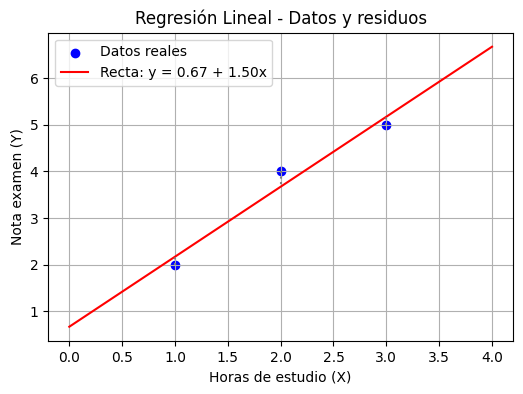

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
X = np.array([1, 2, 3])
Y = np.array([2, 4, 5])

# Coeficientes calculados a mano
b1 = 1.5
b0 = 0.67

# Línea de regresión
x_vals = np.linspace(0, 4, 100)
y_vals = b0 + b1 * x_vals

# Predicciones para cada punto original
Y_pred = b0 + b1 * X

# Gráfico
plt.figure(figsize=(6,4))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(x_vals, y_vals, color='red', label=f'Recta: y = {b0:.2f} + {b1:.2f}x')

# Dibujar residuos
for i in range(len(X)):
    plt.vlines(X[i], Y[i], Y_pred[i], color='gray', linestyle='dotted')

plt.xlabel('Horas de estudio (X)')
plt.ylabel('Nota examen (Y)')
plt.title('Regresión Lineal - Datos y residuos')
plt.legend()
plt.grid(True)
plt.show()


## Paso 5: Predicciones, residuos y evaluación del ajuste

### **1. Predicciones** $$\hat{y}$$

Una vez que tenemos la ecuación de la recta:
$$
\hat{y} = b_0 + b_1 x
$$
Podemos calcular $$\hat{y}_i$$ para cada $$x_i$$  
Estas son las **estimaciones** del modelo, no los valores reales.


### **2. Residuos** $$e_i$$
La diferencia entre el valor real y el valor predicho:
$$
e_i = y_i - \hat{y}_i
$$
- Si \(e_i > 0\), el modelo subestimó el valor real.  
- Si \(e_i < 0\), el modelo lo sobreestimó.

---

### **3. SSE** (Suma de Errores al Cuadrado)
$$
\text{SSE} = \sum e_i^2
$$
- **Qué es:** mide la cantidad de variación en los datos que **el modelo NO logra explicar**.  
- **Cómo se obtiene:** para cada punto, calculamos el residuo \(e_i\) (diferencia entre el valor real \(y_i\) y el predicho \(\hat{y}_i\)), lo elevamos al cuadrado y sumamos todos.  
- **Por qué se eleva al cuadrado:**  
  1. Para que los errores negativos no se cancelen con los positivos.  
  2. Para penalizar más los errores grandes.
- **Interpretación:**  
  - Si la SSE es **pequeña**, significa que los puntos están cerca de la recta → el modelo ajusta bien.  
  - Si la SSE es **grande**, significa que los puntos están muy dispersos respecto a la recta → el modelo ajusta mal.
- **Importante:** la SSE siempre es un número **positivo** (o cero, en el caso ideal donde la recta pasa por todos los puntos).

---

### **4. SST** (Suma Total de Cuadrados)
$$
\text{SST} = \sum (y_i - \bar{y})^2
$$
- **Qué es:** mide la **variación total** que existe en los datos de \(Y\) respecto a su media \(\bar{y}\), **sin usar ningún modelo**.
- **Cómo se obtiene:**  
  1. Calculamos la media de \(Y\), \(\bar{y}\).  
  2. Para cada valor real \(y_i\), medimos su distancia a la media \((y_i - \bar{y})\).  
  3. Elevamos al cuadrado cada distancia y sumamos todo.
- **Interpretación:**  
  - Es el "error total" si lo único que hiciéramos fuera predecir usando la media de \(Y\) para todos los casos.  
  - Cuanto mayor sea la SST, más dispersos están los valores de \(Y\) respecto a su promedio.
- **Relación con otros conceptos:**  
  - En regresión, la SST se descompone en la parte explicada por el modelo (**SSR**) y la no explicada (**SSE**):
    $$
    \text{SST} = \text{SSR} + \text{SSE}
    $$

---

### **5. Coeficiente de determinación** $$R^2$$
$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

- **Qué es:** una medida que indica qué proporción de la variabilidad total de \(Y\) (SST) es explicada por el modelo.
- **Cómo interpretarlo:**
  - \(R^2 = 1\) → el modelo explica el **100%** de la variabilidad; todos los puntos están sobre la recta.
  - \(R^2 = 0\) → el modelo no explica nada; predecir con la recta es igual de malo que predecir con la media.
  - Valores intermedios indican el **porcentaje** de variación explicada por el modelo.
- **Por qué funciona:**  
  - \(\text{SSE}\) mide el error que **queda** después de aplicar el modelo.
  - \(\text{SST}\) mide la variación total de \(Y\).
  - La fracción \(\frac{\text{SSE}}{\text{SST}}\) indica la proporción de variación **no explicada**; al restarla de 1, obtenemos la proporción **explicada**.
- **Nota:** un \(R^2\) alto no garantiza que el modelo sea correcto; solo indica que **ajusta bien a los datos observados**.
- **En modelos con más variables:** es común usar el \(R^2\) ajustado (\(R^2_{adj}\)) para penalizar la inclusión de variables irrelevantes.

**Predicciones y residuos**

| $$x_i$$ | $$y_i$$ | $$\hat{y}_i = b_0 + b_1 x_i$$ | $$e_i = y_i - \hat{y}_i$$ | $$e_i^2$$ |
|---:|---:|---:|---:|---:|
| 1 | 2 | $$\tfrac{13}{6} \approx 2.17$$ | $$-\tfrac{1}{6} \approx -0.17$$ | $$\tfrac{1}{36} \approx 0.0278$$ |
| 2 | 4 | $$\tfrac{11}{3} \approx 3.67$$ | $$\tfrac{1}{3} \approx 0.33$$ | $$\tfrac{1}{9} \approx 0.1111$$ |
| 3 | 5 | $$\tfrac{31}{6} \approx 5.17$$ | $$-\tfrac{1}{6} \approx -0.17$$ | $$\tfrac{1}{36} \approx 0.0278$$ |

**Suma de errores al cuadrado (SSE):**

$$
\text{SSE} = \sum e_i^2 = \frac{1}{36} + \frac{1}{9} + \frac{1}{36} = \frac{1}{6} \approx 0.1667
$$

**Suma total de cuadrados (SST):**

$$
\text{SST} = \sum (y_i - \bar{y})^2 = \frac{25}{9} + \frac{1}{9} + \frac{16}{9} = \frac{14}{3} \approx 4.6667
$$

**Coeficiente de determinación:**

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
= 1 - \frac{1/6}{14/3}
= 1 - \frac{1}{28}
= \frac{27}{28}
\approx 0.9643
$$

**Interpretación:** el modelo explica ~96.4% de la variabilidad de \(Y\) (para este ejemplo simple).

In [ ]:
import numpy as np
import pandas as pd

# Datos
x = np.array([1., 2., 3.])
y = np.array([2., 4., 5.])

# Medias
x_bar = x.mean()
y_bar = y.mean()

# Parámetros por OLS (regresión simple)
b1 = ((x - x_bar)*(y - y_bar)).sum() / ((x - x_bar)**2).sum()
b0 = y_bar - b1*x_bar

# Predicción y residuos
y_hat = b0 + b1*x
resid = y - y_hat

# Métricas
SSE = (resid**2).sum()
SST = ((y - y_bar)**2).sum()
R2  = 1 - SSE/SST

# Tabla resumen
df = pd.DataFrame({
    "x_i": x,
    "y_i": y,
    "y_hat": y_hat,
    "resid": resid,
    "resid^2": resid**2
})

# Mostrar resultados
pd.set_option("display.precision", 4)
print("Parámetros:")
print(f"  b1 (pendiente) = {b1:.4f}")
print(f"  b0 (intercepto) = {b0:.4f}\n")

print("Métricas:")
print(f"  SSE = {SSE:.4f}")
print(f"  SST = {SST:.4f}")
print(f"  R^2 = {R2:.4f}\n")

print("Predicciones y residuos:")
display(df)


Parámetros:
  b1 (pendiente) = 1.5000
  b0 (intercepto) = 0.6667

Métricas:
  SSE = 0.1667
  SST = 4.6667
  R^2 = 0.9643

Predicciones y residuos:


,x_i,y_i,y_hat,resid,resid^2
0,1.0,2.0,2.1667,-0.1667,0.0278
1,2.0,4.0,3.6667,0.3333,0.1111
2,3.0,5.0,5.1667,-0.1667,0.0278


📌 Ejemplos de problemas donde aplicar regresión lineal
1. Predicción de precios
  * Precio de viviendas a partir de variables como metros cuadrados, ubicación, número de habitaciones, etc.
  * Precio de automóviles según año, kilometraje, marca, etc.

2. Pronóstico de demanda o ventas
  * Ventas mensuales de un producto en función del gasto en publicidad, temporada, competidores, etc.
  * Cantidad de energía consumida en función de temperatura, hora del día y día de la semana.

3. Modelos de productividad
  * Rendimiento agrícola en función de cantidad de fertilizante, lluvia y horas de sol.
  * Producción de una máquina en función de horas de funcionamiento y mantenimiento.

4. Evaluación de impacto
  * Incremento de ingresos por campañas de marketing en función del presupuesto invertido.
  * Relación entre experiencia laboral y salario.

5. Predicciones en salud
  * Nivel de glucosa en sangre en función de edad, índice de masa corporal y actividad física.
  * Tiempo de recuperación de un paciente según el tratamiento aplicado.

<b>Importante:</b> en machine learning, la regresión lineal también se usa como baseline (modelo base) antes de probar modelos más complejos como árboles de decisión, random forests o redes neuronales, para comparar si vale la pena aumentar la complejidad.

<b>Tabla de ejemplos</b>
Ejemplos claros de aplicación de regresión lineal por área:

| Área / Dominio        | Variable objetivo (Y)                                | Variables de entrada (X)                                               | Ejemplo de uso                                                                 |
|-----------------------|------------------------------------------------------|-------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Negocios / Ventas** | Ventas mensuales (USD)                               | Gasto en publicidad, descuentos, temporada, competencia                | Predecir ventas de un producto para ajustar inventarios y campañas             |
| **Bienes raíces**     | Precio de vivienda (USD)                             | Metros cuadrados, ubicación, número de habitaciones, antigüedad         | Estimar precio de venta o arriendo de propiedades                              |
| **Industria**         | Producción (unidades)                                | Horas de operación, temperatura, mantenimiento preventivo               | Predecir producción de una máquina y planificar mantenimiento                  |
| **Energía**           | Consumo de energía (kWh)                             | Temperatura exterior, hora del día, día de la semana                     | Pronosticar demanda eléctrica para optimizar generación                        |
| **Marketing**         | Incremento en ingresos (%)                          | Presupuesto en campañas, canal utilizado, duración de campaña           | Medir impacto de una campaña publicitaria                                      |
| **Salud**             | Nivel de glucosa (mg/dL)                             | Edad, IMC, dieta, actividad física                                      | Predecir riesgo de diabetes y personalizar recomendaciones                     |
| **Educación**         | Puntaje en prueba estandarizada                      | Horas de estudio, asistencia a clases, nivel socioeconómico              | Identificar factores que más influyen en el rendimiento académico              |
| **Agricultura**       | Rendimiento de cultivo (toneladas/hectárea)          | Fertilizante aplicado, precipitaciones, horas de sol                     | Optimizar uso de recursos agrícolas                                            |
| **Finanzas**          | Retorno esperado de una inversión (%)                | Volatilidad histórica, tasa de interés, inflación                        | Predecir rentabilidad y riesgo de portafolios                                  |
| **Logística**         | Tiempo de entrega (días)                             | Distancia, método de transporte, carga                                   | Mejorar planificación y rutas de distribución                                 |


<b>Tabla extendida</b>
Donde se indica si el problema se aborda con regresión lineal simple o regresión lineal múltiple.

| Área / Dominio        | Variable objetivo (Y)                                | Variables de entrada (X)                                               | Tipo de regresión      | Justificación                                                                 |
|-----------------------|------------------------------------------------------|-------------------------------------------------------------------------|------------------------|--------------------------------------------------------------------------------|
| **Negocios / Ventas** | Ventas mensuales (USD)                               | Gasto en publicidad, descuentos, temporada, competencia                | Múltiple               | Se usan varias variables predictoras simultáneamente                           |
| **Bienes raíces**     | Precio de vivienda (USD)                             | Metros cuadrados                                                        | Simple                 | Solo se usa una variable predictora (ej. tamaño)                               |
| **Bienes raíces**     | Precio de vivienda (USD)                             | Metros cuadrados, ubicación, número de habitaciones, antigüedad         | Múltiple               | Varias características influyen en el precio                                   |
| **Industria**         | Producción (unidades)                                | Horas de operación                                                      | Simple                 | Una única variable predictora                                                   |
| **Industria**         | Producción (unidades)                                | Horas de operación, temperatura, mantenimiento preventivo               | Múltiple               | Varias variables afectan el rendimiento                                         |
| **Energía**           | Consumo de energía (kWh)                             | Temperatura exterior                                                     | Simple                 | Se analiza el efecto de una sola variable                                       |
| **Energía**           | Consumo de energía (kWh)                             | Temperatura exterior, hora del día, día de la semana                     | Múltiple               | Factores combinados explican el consumo                                         |
| **Marketing**         | Incremento en ingresos (%)                          | Presupuesto en campañas                                                  | Simple                 | Solo se considera el presupuesto como predictor                                 |
| **Marketing**         | Incremento en ingresos (%)                          | Presupuesto, canal, duración de campaña                                 | Múltiple               | Distintas características de la campaña influyen                               |
| **Salud**             | Nivel de glucosa (mg/dL)                             | Edad                                                                     | Simple                 | Única variable predictora                                                       |
| **Salud**             | Nivel de glucosa (mg/dL)                             | Edad, IMC, dieta, actividad física                                      | Múltiple               | Diferentes factores influyen en el nivel de glucosa                             |
| **Educación**         | Puntaje en prueba estandarizada                      | Horas de estudio                                                         | Simple                 | Un único predictor                                                              |
| **Educación**         | Puntaje en prueba estandarizada                      | Horas de estudio, asistencia a clases, nivel socioeconómico              | Múltiple               | Múltiples factores influyen en el rendimiento académico                         |
| **Agricultura**       | Rendimiento de cultivo (toneladas/hectárea)          | Fertilizante aplicado                                                    | Simple                 | Una única variable predictora                                                   |
| **Agricultura**       | Rendimiento de cultivo (toneladas/hectárea)          | Fertilizante, precipitaciones, horas de sol                              | Múltiple               | Factores combinados determinan el rendimiento                                  |
| **Finanzas**          | Retorno esperado de una inversión (%)                | Volatilidad histórica                                                    | Simple                 | Un único factor de riesgo considerado                                           |
| **Finanzas**          | Retorno esperado de una inversión (%)                | Volatilidad, tasa de interés, inflación                                 | Múltiple               | Factores macroeconómicos combinados influyen en el retorno                      |
| **Logística**         | Tiempo de entrega (días)                             | Distancia                                                                | Simple                 | Un único predictor                                                              |
| **Logística**         | Tiempo de entrega (días)                             | Distancia, método de transporte, carga                                   | Múltiple               | Distintas variables logísticas afectan el tiempo de entrega                     |
